<a href="https://colab.research.google.com/github/aesbetancourt/fastai-v3/blob/master/Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Download into file

  Run this code in the browser which will save the URLs of all images you want for your dataset.
  
```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

In [0]:
from fastai import *
from fastai.vision import *

Enable GDrive to download the bear images

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/data/'

**Select an appropiate name for the labeled images**

In [0]:
bears = dict()

bears['black'] = 'urls_black.txt'
bears['teddys'] = 'urls_teddys.txt'
bears['grizzly'] = 'urls_grizzly.txt'

for folder, file in bears.items():
  path = Path(base_dir)
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  
  #Download images into Gdrive
  download_images(path/file, dest, max_pics=200)
    

# Download Images

In [0]:
path = Path(base_dir)
classes = ['black', 'teddys', 'grizzly']

Delete images that can´t be opened

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, Delete=True, max_workers=8)

# View Data

In [12]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path , train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (217 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: /content/gdrive/My Drive/fastai-v3/data;

Valid: LabelList (54 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,teddys,black,teddys,grizzly
Path: /content/gdrive/My Drive/fastai-v3/data;

Test: None

Lets take a look at some od the pictures.

In [0]:
data.classes

['black', 'grizzly', 'teddys']

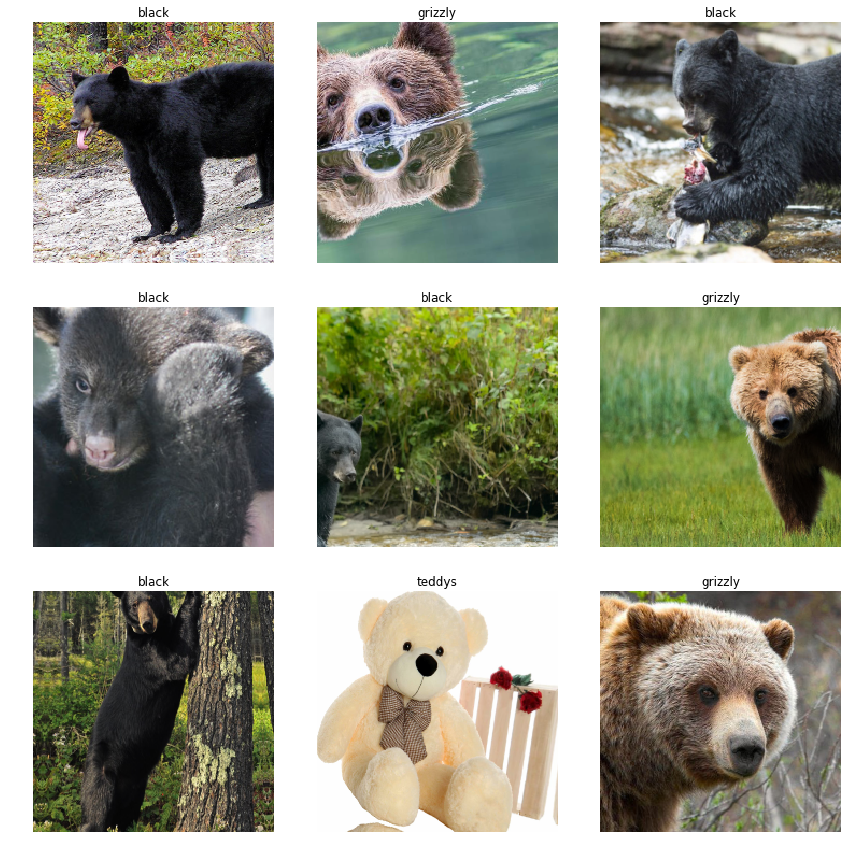

In [13]:
data.show_batch(rows=3, fig_size=(7,8))

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 217, 54)

# Train model

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 140933278.91it/s]


In [0]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


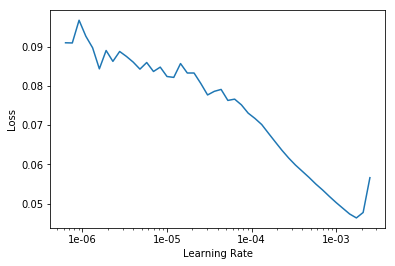

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-3))

In [16]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (217 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,black,black,black,black
Path: /content/gdrive/My Drive/fastai-v3/data;

Valid: LabelList (54 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
black,teddys,black,teddys,grizzly
Path: /content/gdrive/My Drive/fastai-v3/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2

# Intrepretation

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

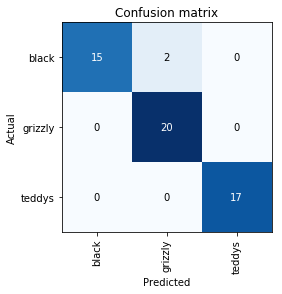

In [18]:
interp.plot_confusion_matrix()

# Cleaning up

# Putting your model in production

In [25]:
 data.classes

['black', 'grizzly', 'teddys']

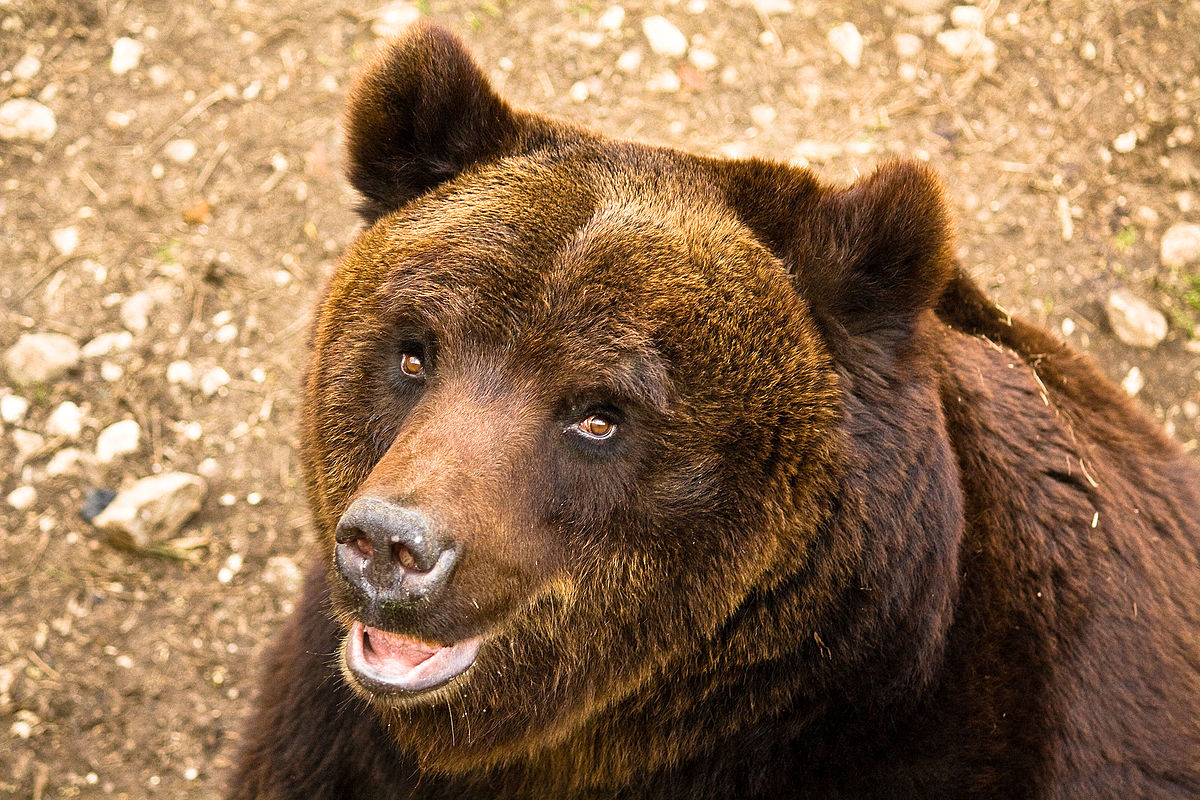

In [28]:
img = open_image(path/'testing'/'oso.jpg')
img

In [0]:
classes = ['black', 'grizzly', 'teddys']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224)
data2.normalize(imagenet_stats)

learn = cnn_learner(data2, models.resnet34)
learn.load('stage-1')

In [29]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class

Category grizzly